In [2]:
# import all the libraries needed to build a toxicity classifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [3]:
toxicity = pd.read_json("social_media_toxicity_dataset.json")

In [4]:
toxicity.head()

,worker_id,task_id,task_response_id,text,Is this text toxic?
0,4RHRV9MACQGW,ccd0a1da-0e6a-453e-a6d1-6418cc4a5546,3d66075c-623e-4e64-93ac-123d379d28f0,I came here to say this exactly!,Not Toxic
1,R7XYZ4FKMFF9,d977c704-4ae3-4381-99de-95014ee57a05,acbd5847-698e-4098-9499-d547948a2da2,Thank you :),Not Toxic
2,MNTYRY6PYPQF,89a4c206-dfbc-40e8-ac73-9bb1b5c8e56e,2def7071-3e27-4b63-bd66-99f041363e2a,I feel a subreddit being born,Not Toxic
3,DR6XNZMT9KRH,41add9eb-bbe3-47d9-8ea2-b571f96fe655,b6e11a16-686d-43da-87f4-8201d8bb2238,Disturbing wholesomeness should be a thing,Not Toxic
4,G6VJRCCGZ9D6,883f5bd6-058c-460f-8e06-c0793af441d1,7f0bdd8f-428a-4ecb-b432-8e6b1f3706c0,Smite jinx... int or pentakill?\n \n \n \n Both.,Not Toxic


In [5]:
# toxicity["is_toxic"].value_

# the "is_toxic" colum contains the label to be predicted. how many example of each type are there? 
toxicity["Is this text toxic?"].value_counts()



Not Toxic    500
Toxic        500
Name: Is this text toxic?, dtype: int64

<Axes: >

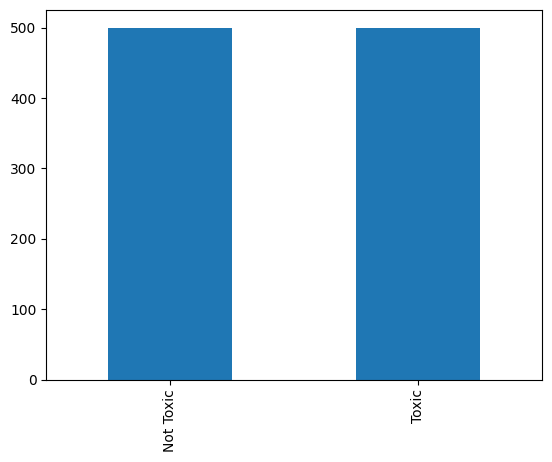

In [6]:
# create a bar chart of the number of examples of each type
toxicity["Is this text toxic?"].value_counts().plot(kind="bar")

Text(0.5, 0, 'Is this text toxic?')

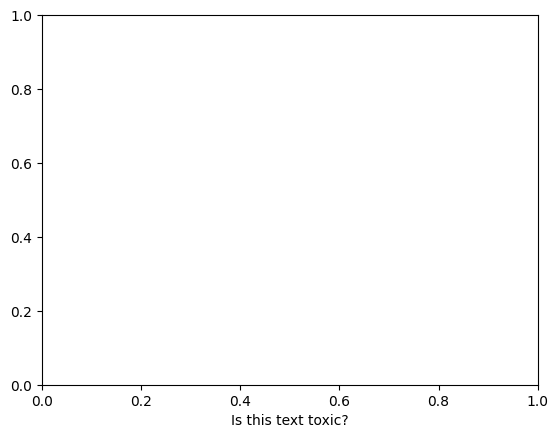

In [7]:
# flip the axes of the bar chart 
plt.xlabel("Is this text toxic?")

<Axes: >

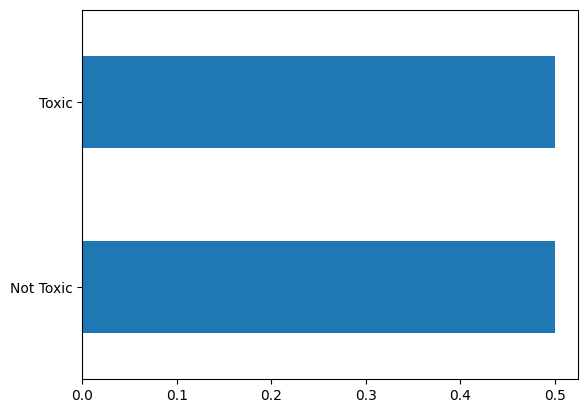

In [8]:
# create a bar chart of the number of examples of each type, but this time, normalize the counts so that the total area of the bars is 1

toxicity["Is this text toxic?"].value_counts(normalize=True).plot(kind="barh")

<Axes: title={'center': 'Toxicity Dataset Breakdown'}>

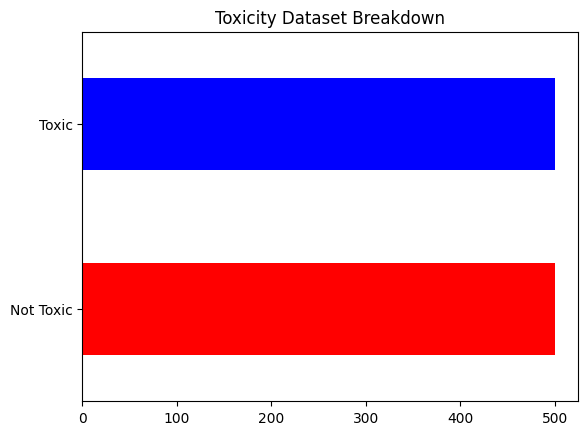

In [9]:
# create a bar chart of the number of example of each class, 
# but with the coordinates of the bars flipped, with the Toxic bar colored red 
# and the Not Toxic bar colored blue 
# of "Toxicity Dataset Breakdown"
toxicity["Is this text toxic?"].value_counts().plot(kind="barh", color=["red", "blue"], title="Toxicity Dataset Breakdown")

In [10]:
# build a classifier to predict whether a text is toxic or not
# using Naive Bayes classifier  

In [11]:
# create a pipeline that uses the CountVectorizer and MultinomialNB to classify the text 
# to predict the toxicity of a text 
pipeline = Pipeline([
    ("vectorizer", CountVectorizer()), 
    ("tfidf", TfidfTransformer()), 
    ("clf", MultinomialNB()) 
])

In [12]:
# use the pipeline to classify 
pipeline.fit(toxicity["text"], toxicity["Is this text toxic?"])

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [13]:
# predict the toxicity of the text 
predictions = pipeline.predict(["this is a toxic text", "this is not a toxic text"])

In [14]:
print(predictions)

['Not Toxic' 'Not Toxic']


In [15]:
# create an array with the following toxic comments: "fuck you!", "you're so stupid", "go kys duckwad"
toxic_comments = ["fuck you!", "you\'re so stupid", "go kys duckwad"]


In [16]:
print(pipeline.predict(toxic_comments))

['Toxic' 'Toxic' 'Toxic']


In [17]:

non_toxic_comments = ["i love you", "she\'s amazing"]

In [18]:
print(pipeline.predict(non_toxic_comments))

['Not Toxic' 'Not Toxic']


In [20]:
# split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(toxicity["text"], toxicity["Is this text toxic?"], test_size=0.2, random_state=42)

In [21]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [22]:
# predict the labels of the testing data 
y_pred = pipeline.predict(X_test)

In [23]:

# print the accuracy score 
print(accuracy_score(y_test, y_pred))

0.855


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Not Toxic       0.84      0.87      0.85        97
       Toxic       0.87      0.84      0.86       103

    accuracy                           0.85       200
   macro avg       0.85      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



In [28]:

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

ValueError: y_true takes value in {'Not Toxic', 'Toxic'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [29]:
# binarize y_test and y_pred 
y_test_bin = y_test.copy() 
y_pred_bin = y_pred.copy() 
y_test_bin[y_test_bin==0] = -1 
y_pred_bin[y_pred_bin==0] = -1 

/var/folders/j4/6wq0rt0j1d7d92jfxsxrxh680000gn/T/ipykernel_75854/3751505430.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_pred_bin[y_pred_bin==0] = -1


In [30]:
y_test = y_test.map({"Toxic": 1, "Not Toxic": 0})

In [31]:
y_pred = pipeline.predict_proba(X_test)[:, 1]

In [32]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

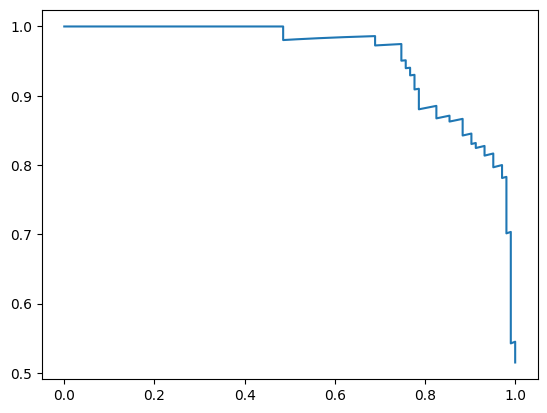

In [34]:
plt.plot(recall, precision)


Text(0.5, 0.5, 'AUC: 0.9552')

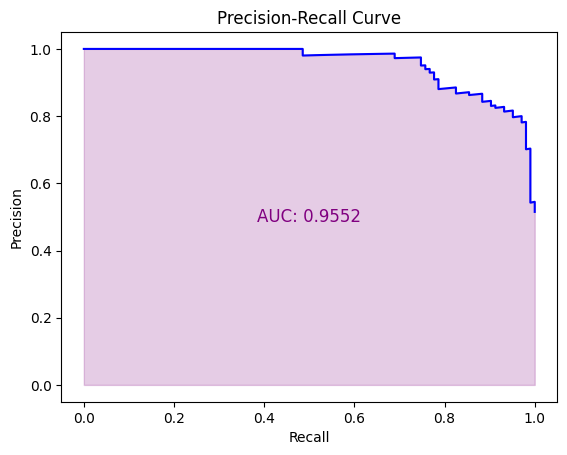

In [38]:
# plot the PR curve with the axes labeled, make it blue, and give it a title 
plt.plot(recall, precision, color="blue", label="PR Curve")
plt.xlabel("Recall")
plt.ylabel("Precision") 
plt.title("Precision-Recall Curve") 

# color the are under the curve purple 
plt.fill_between(recall, precision, color="purple", alpha=0.2) 

# write the AUC on the plot in the middle 
plt.text(0.5, 0.5, "AUC: %.4f" % auc(recall, precision), horizontalalignment="center", verticalalignment="center", fontsize=12, color="purple")